# Understanding the Dataset

In [80]:
# Importing the necessary libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Loading the training data
train = pd.read_csv('/Users/chenyanru/Library/Mobile Documents/com~apple~CloudDocs/Master/Principle of AI and Data Analytics/archive/train.csv')
train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [82]:
y = train.copy()['fake']
X = train.copy()

X.pop('fake')
n_samples,n_features = X.shape
print(n_samples,'samples with',n_features,'features')
X.head()

576 samples with 11 features


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.0,0,53,0,0,32,1000,955
1,1,0.00,2,0.0,0,44,0,0,286,2740,533
2,1,0.10,2,0.0,0,0,0,1,13,159,98
3,1,0.00,1,0.0,0,82,0,0,679,414,651
4,1,0.00,2,0.0,0,0,0,1,6,151,126


In [83]:
print(y.shape)
y.head()

(576,)


0    0
1    0
2    0
3    0
4    0
Name: fake, dtype: int64

# Handling Missing Data

In [84]:
print('Columns with missing values'.center(64,'='))
column_missing = X.isna().any(axis = 0)
print(column_missing)

==================Columns with missing values===================
profile pic             False
nums/length username    False
fullname words          False
nums/length fullname    False
name==username          False
description length      False
external URL            False
private                 False
#posts                  False
#followers              False
#follows                False
dtype: bool


# Transforming Ordinal and Categorical Features

In [85]:
#Understanding the datatypes in the dataset
X.dtypes

profile pic               int64
nums/length username    float64
fullname words            int64
nums/length fullname    float64
name==username            int64
description length        int64
external URL              int64
private                   int64
#posts                    int64
#followers                int64
#follows                  int64
dtype: object

In [86]:
#Checking if any of the columns are of type object
from pandas.api.types import is_object_dtype

for col in X.columns:
    if is_object_dtype(X[col]):
     print(X[col].value_counts(normalize = True))
     print()

In [87]:
#One-hot Encoding or dummy variables for numerical values
#Out of categorical values
X = pd.get_dummies(X)
X.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.0,0,53,0,0,32,1000,955
1,1,0.00,2,0.0,0,44,0,0,286,2740,533
2,1,0.10,2,0.0,0,0,0,1,13,159,98
3,1,0.00,1,0.0,0,82,0,0,679,414,651
4,1,0.00,2,0.0,0,0,0,1,6,151,126


In [88]:
#Dropping the redundant values 
y = pd.get_dummies(y, drop_first = True)
y.head()

,1
0,False
1,False
2,False
3,False
4,False


In [89]:
#Testing the success of the transformation
#encoded_no = y['1'] == 0
#no = train.get_loc([X.index, 'y'] == 'no')

#assert encoded_no.equals(no)

#encoded_yes = y['1'] == 1
#yes = train.get_loc([X.index,'y'] == 'yes')

#assert encoded_yes.equals(yes)

# Standardization/Normalisation of numerical data

In [90]:
#Importing StandardScaler
from sklearn.preprocessing import StandardScaler

#Creating a StandardScaler Object
scaler = StandardScaler()
Xnum = scaler.fit_transform(X)

#Defining the values in y as a 1D numpy array
ynum = y.values.ravel()

# Classification

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Logistic Regression
classifier = LogisticRegression(solver = 'liblinear')

#Splitting our dataset for training and testing
Xtrain, Xtest, ytrain, ytest = train_test_split (Xnum, ynum, test_size = 0.33, random_state = 0)

#Training the regressor
classifier.fit(Xtrain, ytrain)

#Printing the mean accuracy of the classifier using .score()
print('Mean accuracy', classifier.score(Xtrain, ytrain))

Mean accuracy 0.9168831168831169


Measuring Classification Performance

In [92]:
from sklearn.metrics import classification_report

classifier = LogisticRegression(solver = 'liblinear')

#Training to get predictions
classifier.fit(Xtrain, ytrain)
ypred = classifier.predict(Xtest)
print('LogisticRegression'.center(64,'='))
print(classification_report(ytest,ypred,target_names = ['no','yes']))
print('='*64)

=======================LogisticRegression=======================
              precision    recall  f1-score   support

          no       0.85      0.96      0.90        90
         yes       0.96      0.85      0.90       101

    accuracy                           0.90       191
   macro avg       0.90      0.90      0.90       191
weighted avg       0.91      0.90      0.90       191



In [93]:
from sklearn.dummy import DummyClassifier

# Create and fit the dummy model
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(Xtrain, ytrain)

# Evaluate performance
dummy_score = dummy_classifier.score(Xtest, ytest)
print('DummyClassifier mean accuracy:', dummy_score)

DummyClassifier mean accuracy: 0.4712041884816754


In [94]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

# Create and fit the dummy classifier
dumb_classifier = DummyClassifier(strategy='most_frequent')
dumb_classifier.fit(Xtrain, ytrain)

# Evaluate
print('DummyClassifier'.center(64, '='))
print(classification_report(ytest, dumb_classifier.predict(Xtest), target_names=['no', 'yes']))
print('=' * 64)

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg.fit(Xtrain, ytrain)
# Make predictions
log_reg_pred = logreg.predict(Xtest)


from sklearn.metrics import accuracy_score

log_reg_pred = logreg.predict(Xtest)
dummy_pred = dumb_classifier.predict(Xtest)

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Dummy Classifier'],
    'Accuracy': [
        accuracy_score(ytest, log_reg_pred),
        accuracy_score(ytest, dummy_pred)
    ]
})

print(results)

========================DummyClassifier=========================
              precision    recall  f1-score   support

          no       0.47      1.00      0.64        90
         yes       0.00      0.00      0.00       101

    accuracy                           0.47       191
   macro avg       0.24      0.50      0.32       191
weighted avg       0.22      0.47      0.30       191

                 Model  Accuracy
0  Logistic Regression  0.900524
1     Dummy Classifier  0.471204


/Users/chenyanru/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chenyanru/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chenyanru/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


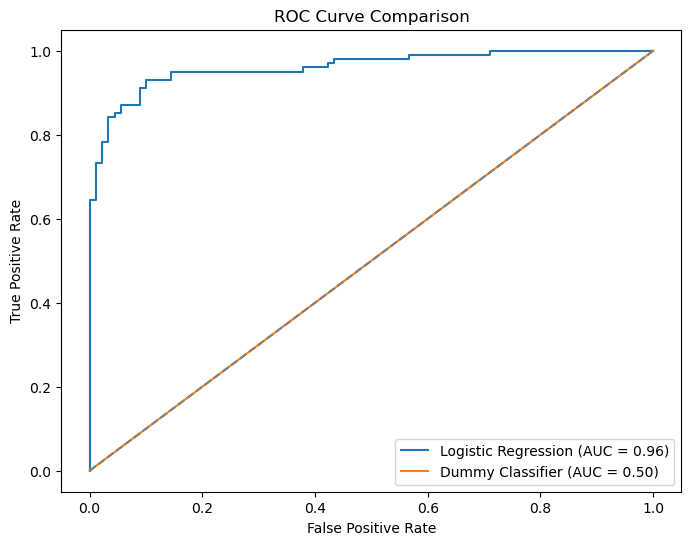

In [95]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define classifiers
classifier = LogisticRegression(solver='liblinear')
dumb_classifier = DummyClassifier(strategy='most_frequent')

# Train
classifier.fit(Xtrain, ytrain)
dumb_classifier.fit(Xtrain, ytrain)

# Get predicted probabilities
yprob = classifier.predict_proba(Xtest)[:, 1]
yprob_dumb = dumb_classifier.predict_proba(Xtest)[:, 1]

# ROC curve
fp_rate, tp_rate, _ = roc_curve(ytest, yprob)
fp_rate_dumb, tp_rate_dumb, _ = roc_curve(ytest, yprob_dumb)

# AUC values
auc_score = auc(fp_rate, tp_rate)
auc_dumb = auc(fp_rate_dumb, tp_rate_dumb)
classifier = LogisticRegression(solver='liblinear', class_weight='balanced')
# Plot
plt.figure(figsize=(8,6))
plt.title('ROC Curve Comparison')
plt.plot(fp_rate, tp_rate, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot(fp_rate_dumb, tp_rate_dumb, label=f'Dummy Classifier (AUC = {auc_dumb:.2f})')
plt.plot([0,1],[0,1],'--', color='gray')  # baseline diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [96]:
from sklearn.metrics import roc_auc_score

print("AUC of Logistic Regression ROC Curve: %1.2f" % roc_auc_score(ytest, ypred))
print("AUC of Dumb Classifier ROC Curve: %1.2f"% roc_auc_score(ytest, ypred_dumb))

AUC of Logistic Regression ROC Curve: 0.90
AUC of Dumb Classifier ROC Curve: 0.50


In [97]:
#Defining Class Weight
classifier = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')

#Training and getting predictions
classifier.fit(Xtrain, ytrain)
print('Balanced Logistic Regression mean accuracy', classifier.score(Xtest, ytest))
classifier.predict(Xtest)
print('Balanced LogisticRegression'.center(64,'='))
print(classification_report(ytest,ypred,target_names = ['no','yes']))
print('='*64)

Balanced Logistic Regression mean accuracy 0.900523560209424
==================Balanced LogisticRegression===================
              precision    recall  f1-score   support

          no       0.85      0.96      0.90        90
         yes       0.96      0.85      0.90       101

    accuracy                           0.90       191
   macro avg       0.90      0.90      0.90       191
weighted avg       0.91      0.90      0.90       191



In [98]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

#Plotting Learning Curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, shuffle=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

#Plotting the Validation Curve
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=5,
                        n_jobs=None, scoring=None):
    train_scores, test_scores = validation_curve(
        estimator, Xnum, ynum, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()
    return plt

<module 'matplotlib.pyplot' from '/Users/chenyanru/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

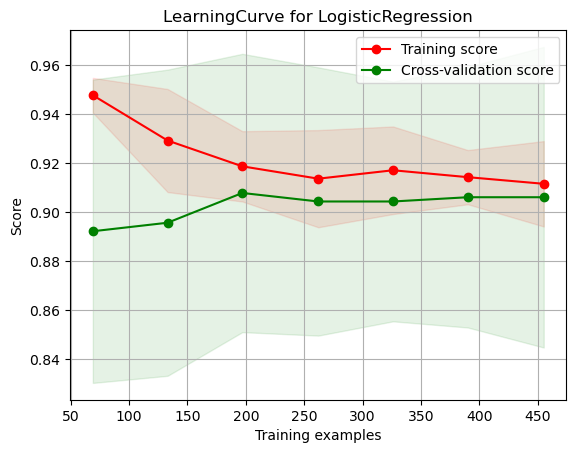

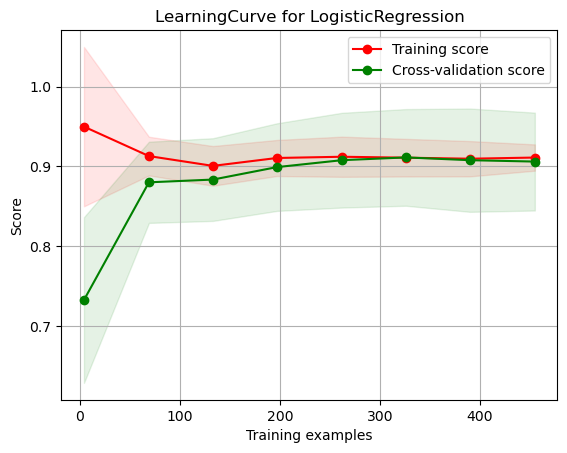

In [99]:
plot_learning_curve(LogisticRegression(solver='liblinear', penalty='l1'), 'LearningCurve for LogisticRegression', Xnum, ynum, cv=5, train_sizes=np.linspace(0.01, 0.99, 8))
plot_learning_curve(LogisticRegression(solver='liblinear', penalty='l1', class_weight='balanced'), 'LearningCurve for LogisticRegression', Xnum, ynum, cv=5, train_sizes=np.linspace(0.01, 0.99, 8))

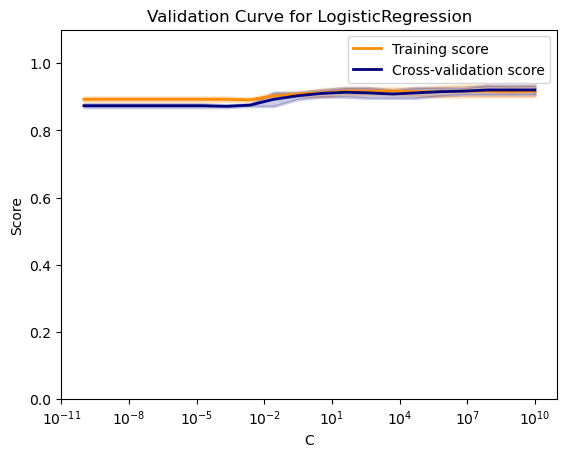

<module 'matplotlib.pyplot' from '/Users/chenyanru/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [100]:
from sklearn.model_selection import learning_curve
param_range = np.logspace(-10, 10, 20)
plot_validation_curve(LogisticRegression(solver='liblinear'), 'Validation Curve for LogisticRegression', Xnum, ynum, "C", param_range, cv=2)

In [101]:
# Example: recompute with CV to pick best C programmatically
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

Cs = np.logspace(-3, 3, 13)   # narrower, practical range
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_means = []
for C in Cs:
    clf = LogisticRegression(solver='liblinear', C=C, class_weight='balanced')
    scores = cross_val_score(clf, Xnum, ynum, cv=cv, scoring='roc_auc')
    cv_means.append(scores.mean())

best_C = Cs[int(np.argmax(cv_means))]
best_C, max(cv_means)

(1000.0, 0.9686922419008281)

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('scaler', StandardScaler(with_mean=False) if hasattr(Xnum, 'toarray') else StandardScaler()),
    ('lr', LogisticRegression(solver='liblinear', C=best_C, class_weight='balanced', random_state=42))
])
pipe.fit(Xtrain, ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(C=1000.0, class_weight='balanced',
                                    random_state=42, solver='liblinear'))])

In [103]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

yprob = pipe.predict_proba(Xtest)[:,1]
ypred = pipe.predict(Xtest)

print("ROC AUC:", roc_auc_score(ytest, yprob))
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred, target_names=['no','yes'], zero_division=0))

ROC AUC: 0.9576457645764577
[[86  4]
 [17 84]]
              precision    recall  f1-score   support

          no       0.83      0.96      0.89        90
         yes       0.95      0.83      0.89       101

    accuracy                           0.89       191
   macro avg       0.89      0.89      0.89       191
weighted avg       0.90      0.89      0.89       191



In [104]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score

prec, rec, th = precision_recall_curve(ytest, yprob)
f1s = [f1_score(ytest, (yprob>=t).astype(int)) for t in th]
best_t = th[int(np.argmax(f1s))]
best_t, max(f1s)

# Use best threshold
ypred_thr = (yprob >= best_t).astype(int)
print(classification_report(ytest, ypred_thr, target_names=['no','yes'], zero_division=0))

              precision    recall  f1-score   support

          no       0.90      0.88      0.89        90
         yes       0.89      0.91      0.90       101

    accuracy                           0.90       191
   macro avg       0.90      0.89      0.89       191
weighted avg       0.90      0.90      0.90       191



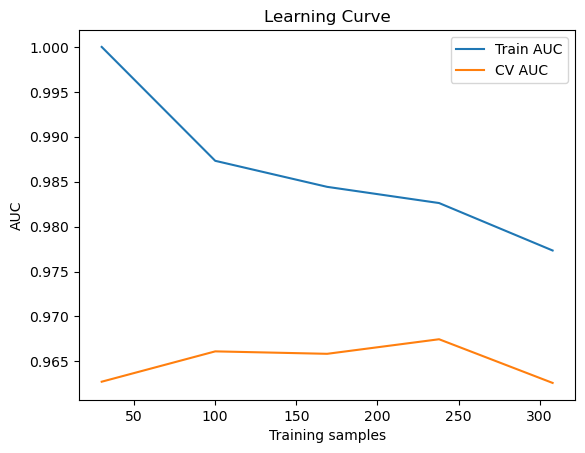

In [105]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
train_sizes, train_scores, val_scores = learning_curve(
    pipe, Xtrain, ytrain, cv=5, scoring='roc_auc',
    train_sizes=np.linspace(0.1,1.0,5), random_state=42
)
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train AUC')
plt.plot(train_sizes, val_scores.mean(axis=1), label='CV AUC')
plt.xlabel('Training samples'); plt.ylabel('AUC'); plt.legend(); plt.title('Learning Curve'); plt.show()

In [106]:
import pandas as pd
coef = pipe.named_steps['lr'].coef_[0]
feat_names = getattr(Xnum, 'columns', [f'x{i}' for i in range(len(coef))])
coef_df = pd.DataFrame({'feature': feat_names, 'coef': coef}).sort_values('coef', ascending=False)
coef_df.head(10), coef_df.tail(10)

(   feature      coef
 4       x4  1.888250
 1       x1  1.775144
 10     x10  0.180804
 3       x3  0.064909
 7       x7 -0.179230
 5       x5 -0.289954
 2       x2 -0.447340
 0       x0 -2.144313
 6       x6 -2.882223
 8       x8 -9.278596,
    feature       coef
 1       x1   1.775144
 10     x10   0.180804
 3       x3   0.064909
 7       x7  -0.179230
 5       x5  -0.289954
 2       x2  -0.447340
 0       x0  -2.144313
 6       x6  -2.882223
 8       x8  -9.278596
 9       x9 -17.916152)

In [107]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=300, max_depth=None, min_samples_leaf=2,
    class_weight='balanced', random_state=42, n_jobs=-1
).fit(Xtrain, ytrain)

from sklearn.metrics import roc_auc_score
print("RF ROC AUC:", roc_auc_score(ytest, rf.predict_proba(Xtest)[:,1]))

RF ROC AUC: 0.9804180418041804


In [108]:
print("Train Accuracy:", pipe.score(Xtrain, ytrain))
print("Test Accuracy:", pipe.score(Xtest, ytest))

Train Accuracy: 0.922077922077922
Test Accuracy: 0.8900523560209425


In [109]:
from sklearn.metrics import roc_auc_score
print("ROC AUC:", roc_auc_score(ytest, yprob))

ROC AUC: 0.9576457645764577


In [110]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

# Predictions
rf_pred = rf.predict(Xtest)
rf_prob = rf.predict_proba(Xtest)[:, 1]

# Metrics
rf_auc = roc_auc_score(ytest, rf_prob)
acc_rf = accuracy_score(ytest, rf_pred)
f1_rf = f1_score(ytest, rf_pred)

print("Random Forest AUC:", rf_auc)
print("Random Forest Accuracy:", acc_rf)
print("Random Forest F1:", f1_rf)

Random Forest AUC: 0.9804180418041804
Random Forest Accuracy: 0.9267015706806283
Random Forest F1: 0.9292929292929293


In [111]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# ----- DUMMY CLASSIFIER -----
dumb_pred = dumb_classifier.predict(Xtest)
dumb_prob = dumb_classifier.predict_proba(Xtest)[:, 1]

acc_dumb = accuracy_score(ytest, dumb_pred)
f1_dumb = f1_score(ytest, dumb_pred)
auc_dumb = roc_auc_score(ytest, dumb_prob)

# ----- LOGISTIC REGRESSION -----
log_pred = classifier.predict(Xtest)
log_prob = classifier.predict_proba(Xtest)[:, 1]

acc_lr = accuracy_score(ytest, log_pred)
f1_lr = f1_score(ytest, log_pred)
auc_score = roc_auc_score(ytest, log_prob)

# ----- RANDOM FOREST -----
rf_pred = rf.predict(Xtest)
rf_prob = rf.predict_proba(Xtest)[:, 1]

acc_rf = accuracy_score(ytest, rf_pred)
f1_rf = f1_score(ytest, rf_pred)
rf_auc = roc_auc_score(ytest, rf_prob)

In [112]:
results = pd.DataFrame({
    'Model': ['Dummy', 'Logistic Regression', 'Random Forest'],
    'AUC': [auc_dumb, auc_score, rf_auc],
    'Accuracy': [acc_dumb, acc_lr, acc_rf],
    'F1': [f1_dumb, f1_lr, f1_rf]
})
results

,Model,AUC,Accuracy,F1
0,Dummy,0.500000,0.471204,0.000000
1,Logistic Regression,0.961386,0.900524,0.900524
2,Random Forest,0.980418,0.926702,0.929293


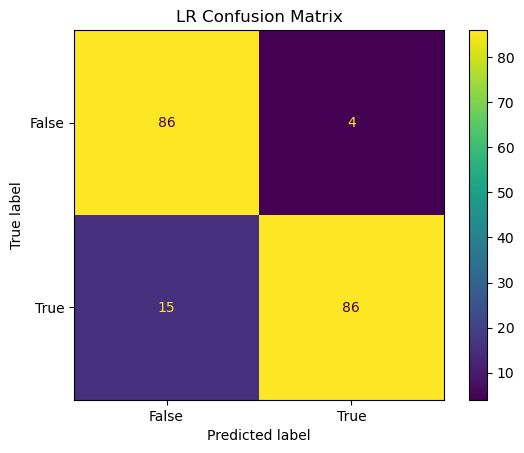

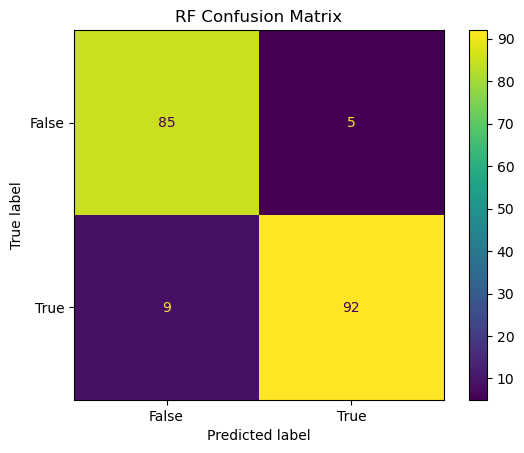

In [113]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for name, clf in [("LR", classifier), ("RF", rf)]:
    ConfusionMatrixDisplay.from_estimator(clf, Xtest, ytest)
    plt.title(f"{name} Confusion Matrix")
    plt.show()

In [114]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score, classification_report

def best_threshold(y_true, y_prob, metric='f1'):
    prec, rec, thr = precision_recall_curve(y_true, y_prob)
    if metric=='f1':
        scores = [f1_score(y_true, (y_prob>=t).astype(int)) for t in thr]
    idx = int(np.argmax(scores))
    return thr[idx], scores[idx]

thr_lr, f1_lr_opt = best_threshold(ytest, classifier.predict_proba(Xtest)[:,1])
ypred_lr_opt = (classifier.predict_proba(Xtest)[:,1] >= thr_lr).astype(int)
print("LR best threshold:", round(thr_lr,3))
print(classification_report(ytest, ypred_lr_opt, zero_division=0))

LR best threshold: 0.26
              precision    recall  f1-score   support

       False       0.92      0.90      0.91        90
        True       0.91      0.93      0.92       101

    accuracy                           0.92       191
   macro avg       0.92      0.92      0.92       191
weighted avg       0.92      0.92      0.92       191



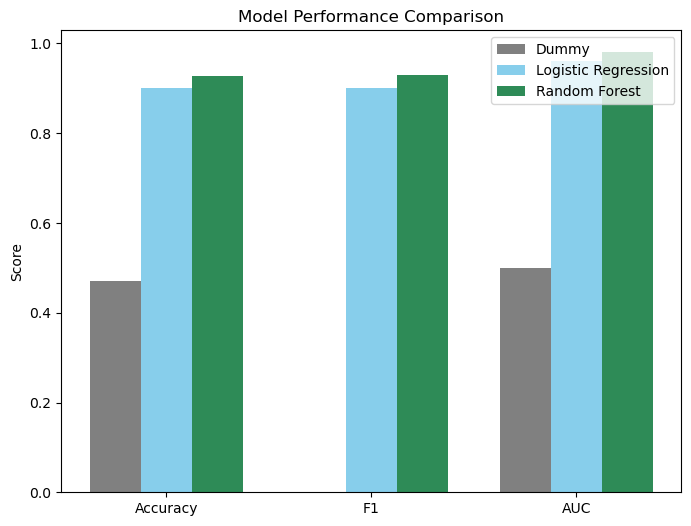

In [115]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'F1', 'AUC']
values_lr = [acc_lr, f1_lr, auc_score]
values_rf = [acc_rf, f1_rf, rf_auc]
values_dumb = [acc_dumb, f1_dumb, auc_dumb]

x = range(len(metrics))
width = 0.25

plt.figure(figsize=(8,6))
plt.bar([i - width for i in x], values_dumb, width, label='Dummy', color='gray')
plt.bar(x, values_lr, width, label='Logistic Regression', color='skyblue')
plt.bar([i + width for i in x], values_rf, width, label='Random Forest', color='seagreen')
plt.xticks(x, metrics)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.show()

---
**Project:** Social Media Fake Account Detection  
**Author:** Nash Chen  
**Tools:** Python, scikit-learn, pandas, matplotlib  
**Goal:** Build and evaluate models to detect fake accounts using supervised learning.  
--- 